# Exploratory Data Analysis (EDA) for eCommerce Transactions
## This notebook explores the provided datasets, knowing the data to uncover insights, identify opportunities, and recommend improvements for the eCommerce business

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting styles for visualizations
sns.set(style="whitegrid", palette="viridis")
%matplotlib inline

In [5]:
# Load datasets
customers = pd.read_csv(r"C:\Users\Abhay Thakur\Downloads\Customers.csv")
products = pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\Transactions.csv')

In [8]:
# Display basic info
customers.info()
print(f"Dataset shape : {customers.shape}")
print()
products.info()
print(f"Dataset shape : {products.shape}")
print()
transactions.info()
print(f"Dataset shape : {transactions.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Dataset shape : (200, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Dataset shape : (100, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dt

In [9]:
# Preview datasets
display(customers.head(7), products.head(7), transactions.head(7))

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68


In [11]:
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())



Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


# 

In [12]:
# Data Transformation and Merging

# Extract brand name from ProductName
products['Brand'] = products['ProductName'].str.split().str[0]
products['ProductName'] = products.apply(lambda row: row['ProductName'].replace(row['Brand'] + ' ', ''), axis=1)

# Merge datasets
transactions_with_brands = transactions.merge(products[['ProductID', 'Brand', 'ProductName']], on='ProductID', how='left')
transactions_full = transactions_with_brands.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Preview merged dataset
display(transactions_full.sample(10))

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Brand,ProductName,Region
460,T00057,C0062,P059,2024-07-03 07:10:58,3,909.60,303.20,SoundWave,Jeans,Europe
644,T00088,C0019,P001,2024-01-30 17:23:03,2,338.60,169.30,ActiveWear,Biography,Europe
989,T00549,C0093,P077,2024-09-16 02:11:37,2,531.02,265.51,ActiveWear,Smartwatch,Asia
153,T00098,C0090,P070,2024-08-28 02:11:58,3,146.07,48.69,HomeSense,T-Shirt,Asia
874,T00782,C0188,P075,2024-08-27 05:49:59,3,1493.28,497.76,TechPro,Textbook,South America
236,T00940,C0059,P084,2024-09-14 15:29:16,4,1351.64,337.91,ActiveWear,Wall Art,North America
227,T00100,C0197,P084,2024-05-08 15:48:20,3,1013.73,337.91,ActiveWear,Wall Art,Europe
897,T00756,C0028,P028,2024-02-15 04:29:17,3,706.74,235.58,HomeSense,Desk Lamp,Asia
533,T00939,C0010,P081,2024-03-29 07:04:02,3,198.96,66.32,HomeSense,Sweater,Europe
382,T00178,C0173,P027,2024-01-05 13:14:07,2,458.12,229.06,SoundWave,Headphones,Asia


In [17]:
tf=transactions_full

tf.info()
print()
print(tf.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   Brand            1000 non-null   object 
 8   ProductName      1000 non-null   object 
 9   Region           1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 85.9+ KB

(1000, 10)


In [18]:
tf.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [19]:
#Feature Engineering

# Converting TransactionDate to DateTime format
tf['TransactionDate'] = pd.to_datetime(tf['TransactionDate'])

# Extracting additional time components
tf['Year'] = tf['TransactionDate'].dt.year
tf['Month'] = tf['TransactionDate'].dt.month
tf['Day'] = tf['TransactionDate'].dt.day
tf['Hour'] = tf['TransactionDate'].dt.hour
tf['DayOfWeek'] = tf['TransactionDate'].dt.dayofweek


# 

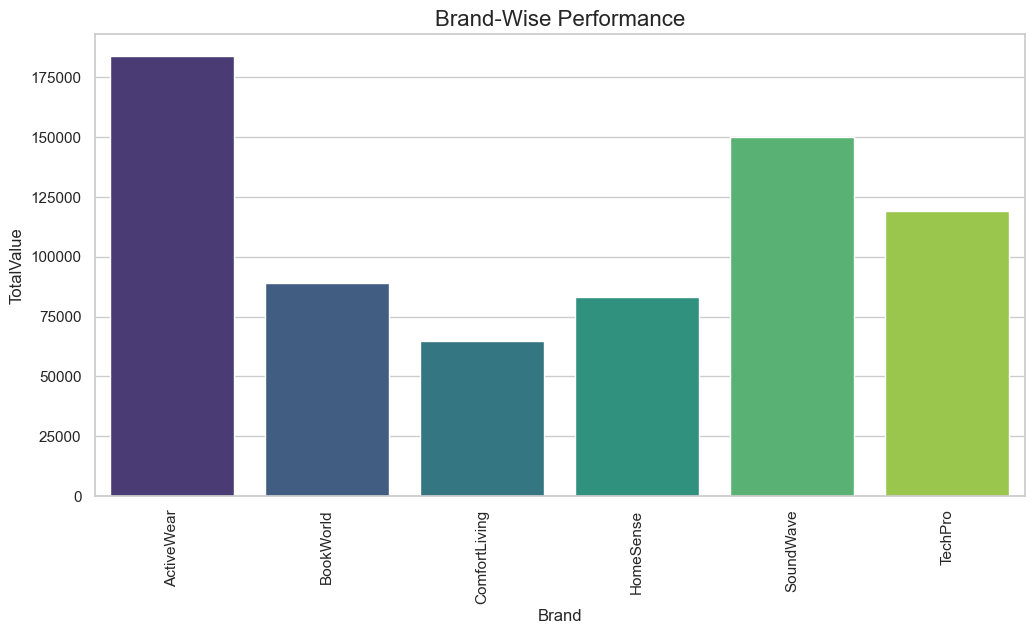

In [20]:
# 7.1 Brand-Wise Performance
brand_performance = tf.groupby('Brand')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='TotalValue', data=brand_performance, palette='viridis')
plt.title('Brand-Wise Performance', fontsize=16)
plt.xticks(rotation=90)
plt.show()

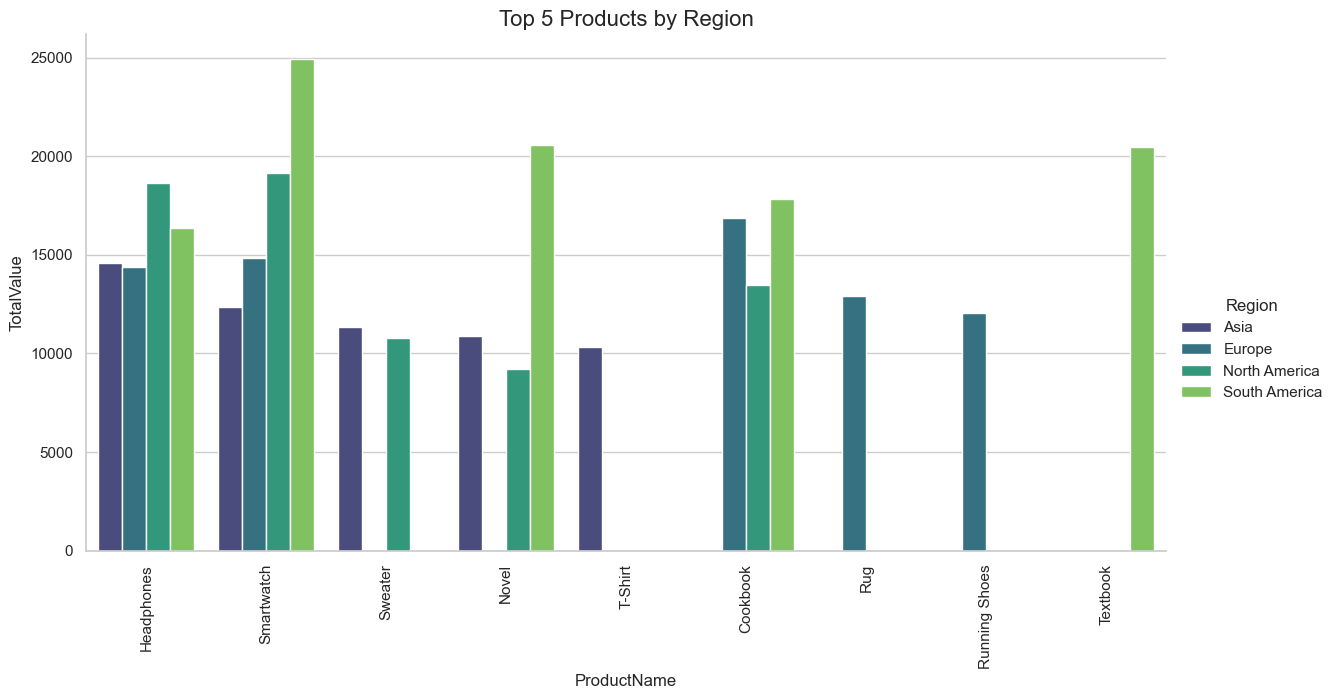

In [21]:
# 7.2 Top Products by Region
top_products_per_region = tf.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()
top_products_per_region = top_products_per_region.groupby('Region').apply(lambda x: x.nlargest(5, 'TotalValue')).reset_index(drop=True)

sns.catplot(x='ProductName', y='TotalValue', hue='Region', data=top_products_per_region, kind='bar', height=6, aspect=2, palette='viridis')
plt.title('Top 5 Products by Region', fontsize=16)
plt.xticks(rotation=90)
plt.show()


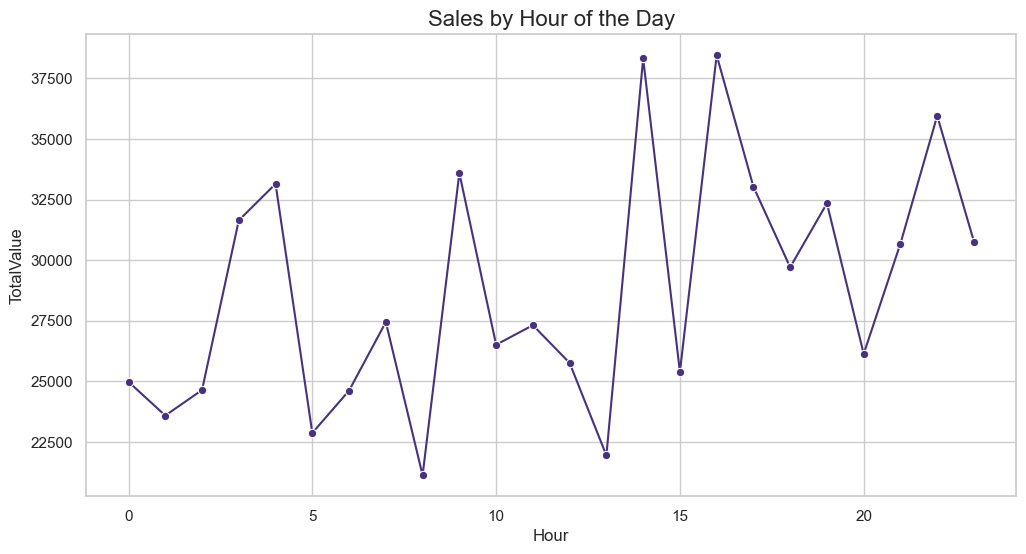

In [22]:
# 7.3 Sales by Hour
hourly_sales = tf.groupby('Hour')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TotalValue', data=hourly_sales, marker='o')
plt.title('Sales by Hour of the Day', fontsize=16)
plt.show()


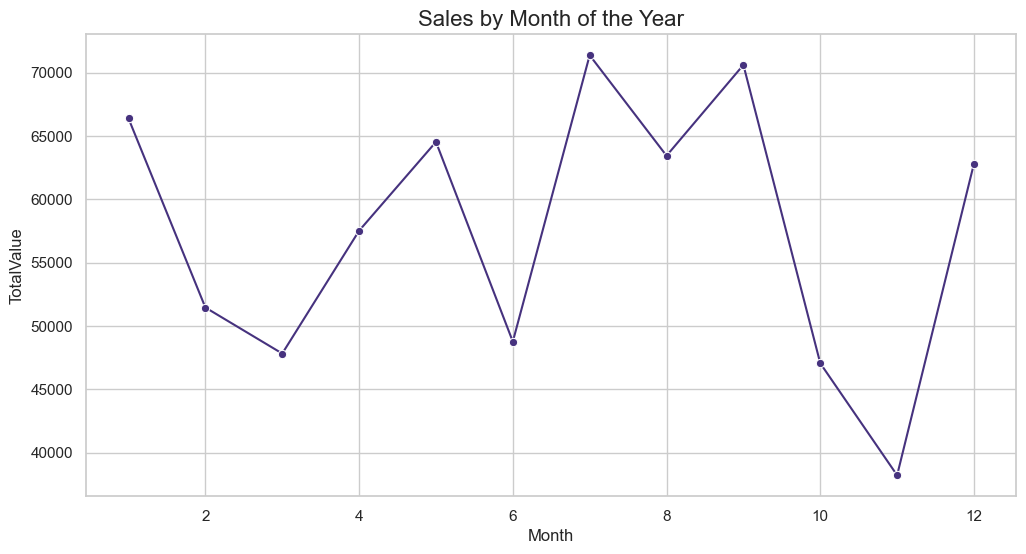

In [23]:
# 7.4 Sales by Month
monthly_sales = tf.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales, marker='o')
plt.title('Sales by Month of the Year', fontsize=16)
plt.show()


<Figure size 1500x1000 with 0 Axes>

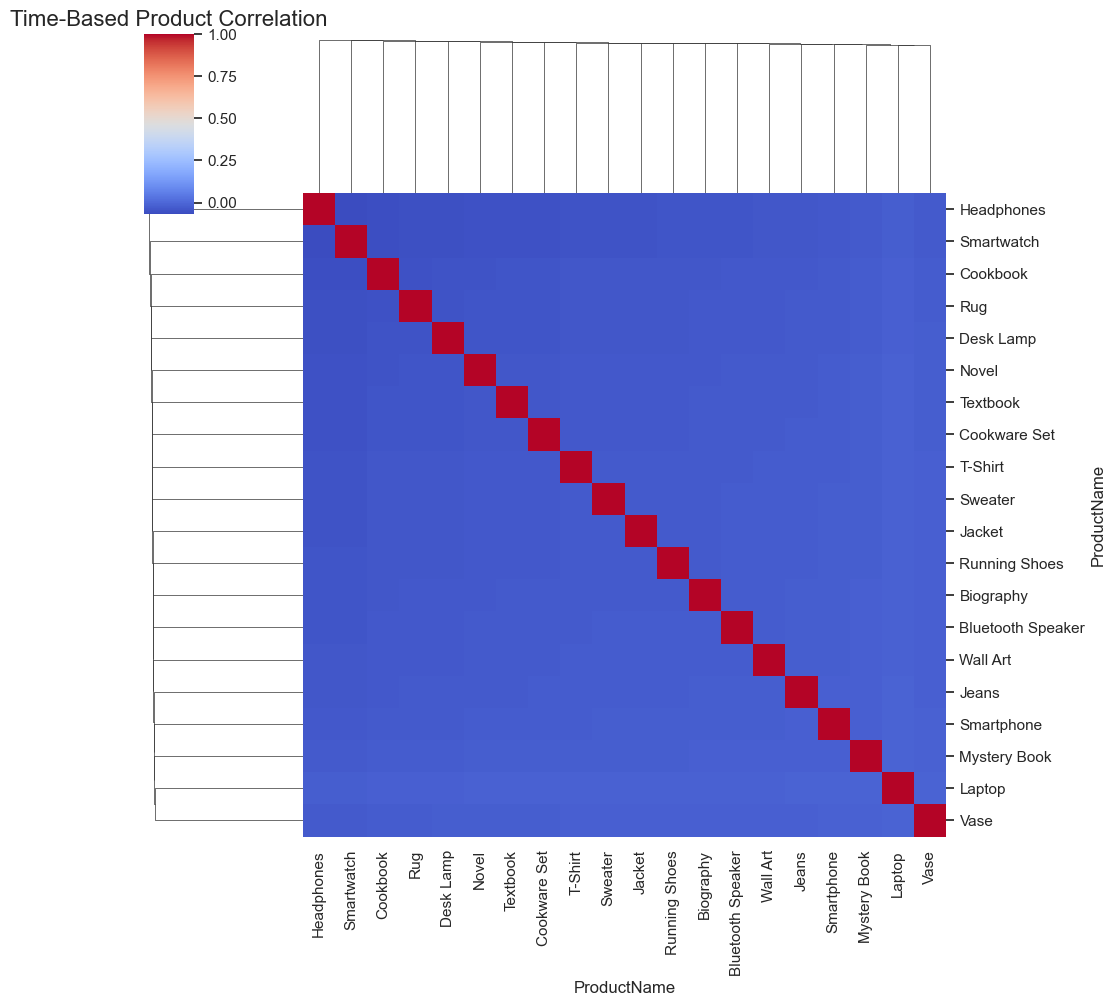

In [24]:
# 7.5 Time-Based Product Correlation
product_sales_over_time = tf.pivot_table(index='TransactionDate', columns='ProductName', values='TotalValue', aggfunc='sum').fillna(0)
product_sales_corr = product_sales_over_time.corr()

plt.figure(figsize=(15, 10))
sns.clustermap(product_sales_corr, cmap='coolwarm', annot=False)
plt.title('Time-Based Product Correlation', fontsize=16)
plt.show()
